
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;">Due: Wed, October 4th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

In a model, the choice of K is indeed just a tradeoff between bias and variance. When the value of K is large, the model will be complex which lead to high variance and low bias. On the other hand, if the value of K is small, the model will be simple so that it would have low variance and high bias. 

# Question 2: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answer

In [1]:
import pandas as pd
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv('russett_full_v2.csv')
data[:5]

,country,gini,farm,rent,gnpr,labo,inst,ecks,death,demo_class,demo_score
0,Argentina,86.3,98.2,47.9,374,25,16.6,47.0,217,2,35
1,Australia,92.9,99.6,30.0,1215,14,19.3,0.0,0,1,89
2,Austria,74.0,97.4,25.7,532,32,15.8,4.0,0,2,52
3,Belgium,58.7,85.8,98.3,1015,10,23.5,8.0,1,1,98
4,Bolivia,93.8,97.7,35.0,66,72,18.3,43.0,663,3,19


# part a

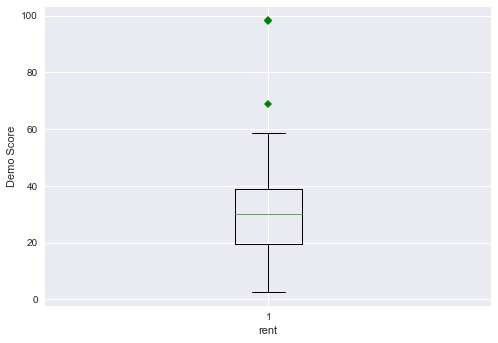

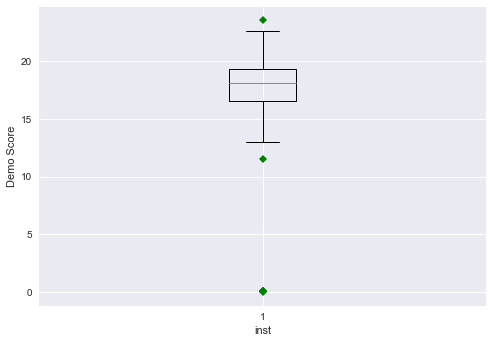

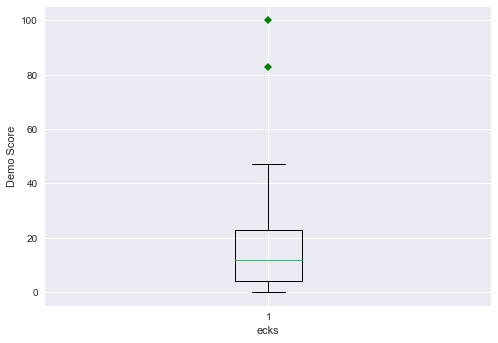

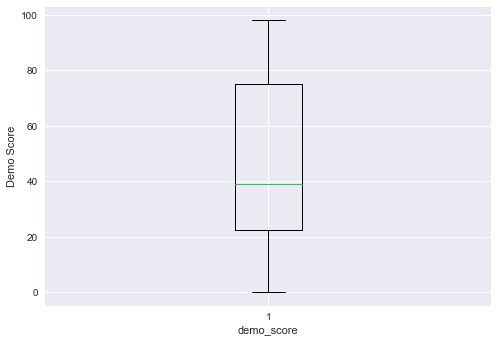

In [2]:
list =['rent', 'inst','ecks','demo_score']
for i in list:
    boxplot(data[i],0,'gD')
    xlabel(i)
    ylabel('Demo Score')
    show()

Based on the graphs above, we can identify the cutoff ouliters by seeing if there are points that are outside of the inner fence. For rent, the custoff value should be above 60(since rent cannot be negative, we do not worry about the down side). For inst, cutoff values should be below 12.5 and above 23. For ecks, it should be above 50 and under 0. And for demo_score, the cutoff values should be above 100 and below 0 although there is none in our case.

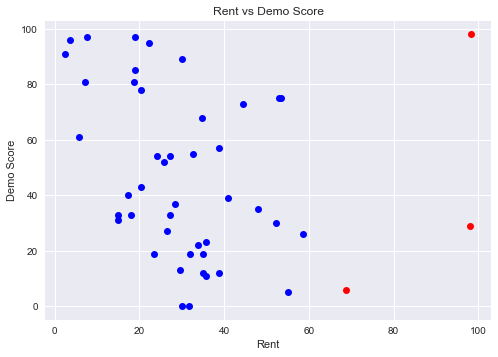

In [3]:
outlier_mask = np.logical_or(data['rent'] < 0, data['rent'] > 60)
non_outlier_mask = [not i for i in outlier_mask]
plt.plot(data['rent'][non_outlier_mask], data['demo_score'][non_outlier_mask],marker='o',color='blue',linestyle='None')
plt.plot(data['rent'][outlier_mask], data['demo_score'][outlier_mask], marker='o',color='red', linestyle='None')
xlabel('Rent')
ylabel('Demo Score')
title('Rent vs Demo Score')
plt.show()


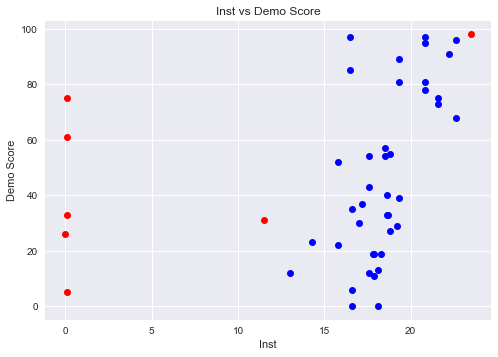

In [4]:
outlier_mask = np.logical_or(data['inst'] < 12.5, data['inst'] > 23)
non_outlier_mask = [not i for i in outlier_mask]
plt.plot(data['inst'][non_outlier_mask], data['demo_score'][non_outlier_mask],marker='o',color='blue',linestyle='None')
plt.plot(data['inst'][outlier_mask], data['demo_score'][outlier_mask], marker='o',color='red', linestyle='None')
xlabel('Inst')
ylabel('Demo Score')
title('Inst vs Demo Score')
plt.show()


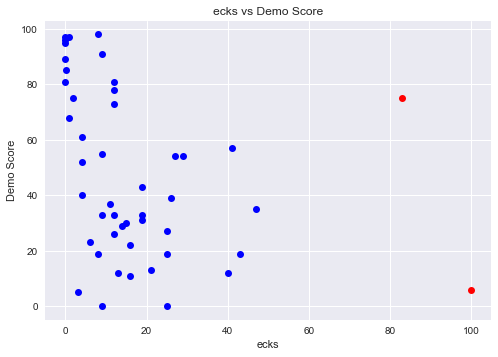

In [5]:
outlier_mask = np.logical_or(data['ecks'] < 0, data['ecks'] > 50)
non_outlier_mask = [not i for i in outlier_mask]
plt.plot(data['ecks'][non_outlier_mask], data['demo_score'][non_outlier_mask],marker='o',color='blue',linestyle='None')
plt.plot(data['ecks'][outlier_mask], data['demo_score'][outlier_mask], marker='o',color='red', linestyle='None')
xlabel('ecks')
ylabel('Demo Score')
title('ecks vs Demo Score')
plt.show()


By including the outliers in the model, it will greatly affect our prediction on demo_score values and probably generate predicted values that are far from the actual values, especially in linear regression case.

In [6]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('demo_score ~ rent + inst + ecks', data=data, return_type='dataframe')

C:\Users\zjj27\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)  

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(X_train, y_train)

In [9]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
a = np.sqrt(mean_squared_error(y_train, prediction_train))
b = np.sqrt(mean_squared_error(y_test, prediction_test))
print("Root Mean squared error in training set: %.2f"% a)
print("Root Mean squared error in testing set: %.2f"%b)
print("When I plot the OLS on testing set, the RMSE has increase %.2f" %(b-a))

Root Mean squared error in training set: 25.78
Root Mean squared error in testing set: 32.58
When I plot the OLS on testing set, the RMSE has increase 6.80


In [10]:
from sklearn.linear_model import HuberRegressor
model = HuberRegressor(alpha=0)
result = model.fit(X_train, y_train)


C:\Users\zjj27\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
a = np.sqrt(mean_squared_error(y_train, prediction_train))
b = np.sqrt(mean_squared_error(y_test, prediction_test))
print("Root Mean squared error in training set: %.2f"% a)
print("Root Mean squared error in testing set: %.2f"%b)
print("When I plot the Huuber Regression on testing set, the RMSE has increase %.2f" %(b-a))

Root Mean squared error in training set: 26.84
Root Mean squared error in testing set: 29.17
When I plot the Huuber Regression on testing set, the RMSE has increase 2.33


# part d

From part c, we can see that corresponding RMSE value for both OLS and Robust Huber regression. We find that OLS regression method did a better job than Huber regression in training set since it has lower RMSE value. On the other hand, Huber regression did a better than OLS in testing data set since it has lower RMSE value. Since we are more interested in the RMSE value in testing set, we vote for Huber regression method in this particular problem.

The following plots show the residual plots from OLS and Huber Regression methods respectively. In generally, Huber regression method tend to be less affected by the existence of outlier since it has linear error instead of a square error terms. In this case, since the data contain outliers and OLS method is more sensitive to outliers. Therefore, Huber did a better job in predicting since it is less sensitive to outliers compare to OLS method.  

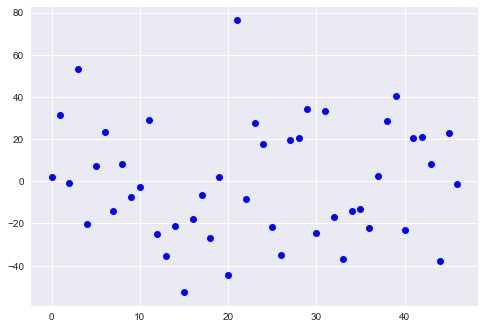

In [12]:
# using all data
model_LR = LinearRegression()
result = model_LR.fit(X, y)
prediction_LR = model_LR.predict(X)
plot((y- prediction_LR),marker='o',color='blue',linestyle='None')
show()

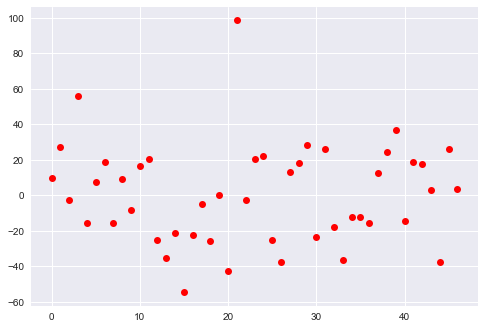

In [13]:
model_HR = HuberRegressor(alpha=0)
result = model_HR.fit(X, y)
prediction_HR = model_HR.predict(X)
plot(y.sub(prediction_HR,axis=0),marker= 'o',color='red',linestyle='None')
show()

# Question 3 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$ ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

# Question 4 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [14]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [15]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

# Part A

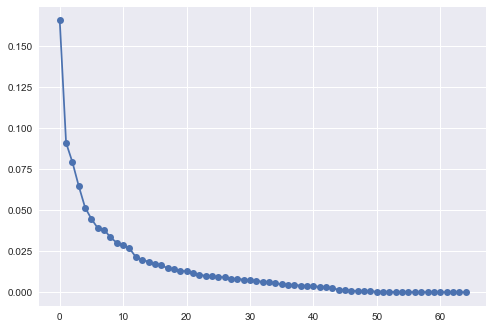

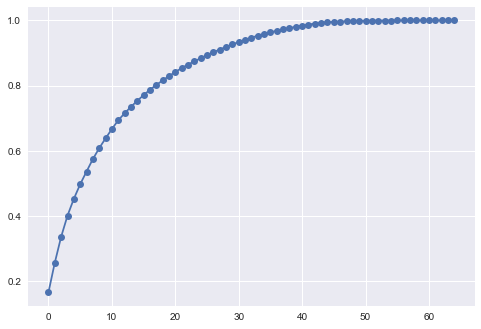

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plot(pca.explained_variance_ratio_, marker='o')
show()
plot(pca.explained_variance_ratio_.cumsum(), marker='o') 
show()

# Part B

In [17]:
a= pca.explained_variance_ratio_.cumsum()
num_30= next(x[0] for x in enumerate(a) if x[1] > 0.3)+1
num_60= next(x[0] for x in enumerate(a) if x[1] > 0.6)+1
num_90= next(x[0] for x in enumerate(a) if x[1] > 0.9)+1
print(num_30,num_60,num_90),"components are required to explain cumulative variance of 30%, 60%, and 90%, respectively"

(3, 9, 27) components are required to explain cumulative variance of 30%, 60%, and 90%, respectively


# Part C

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_N1=X[:,:3]
result = model.fit(X_N1, y)
prediction = model.predict(X_N1)
print 'MSE value using 3 components is:',mean_squared_error(y, prediction)

MSE value using 3 components is: 3848.9437584


In [19]:
model = LinearRegression()
X_N2=X[:,:9]
result = model.fit(X_N2, y)
prediction = model.predict(X_N2)
print 'MSE value using 9 components is:',mean_squared_error(y, prediction)

MSE value using 9 components is: 2866.65957082


In [20]:
model = LinearRegression()
X_N3=X[:,:27]
result = model.fit(X_N3, y)
prediction = model.predict(X_N3)
print 'MSE value using 27 components is:',mean_squared_error(y, prediction)

MSE value using 27 components is: 2648.06311267


By using the whole data set, when we increase the number of components in the data set, the MSE value decreases. Therefore, the more components we use, the lower MSE value we get in this case. 

# Question 5 -  Feature Selection ( 5 points )

Explain what you understand by the two wrapper methods for feature selection (forward and backward selection) (no more than 1 paragraph). 


For forward selection, it begins with null model with just the intercept. Then it goes through every single variable model and pick the first best predictor that minimize the residual sum of square. Then it just continues this process util it gets the remaining predictors and some stopping rule is satisfied. On the other hand, backward selection starts with the model that contains all the predictors and then remove the predictor that has largest p-value(least significant). It just repeats this util it gets all the predictors that satisfy certain condition or threshold.